# Visualize FER2013 Train Loader Transforms
This notebook demonstrates how the data augmentation and preprocessing transforms affect the FER2013 training images. We use the utilities from `train_fer.py`.

In [1]:
import os
import sys
import torch
import torchvision
import matplotlib.pyplot as plt

# Add parent directory to path to import train_fer utilities
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("./train_fer.py"), '..')))
from FER import train_fer

Loaded 28709 train samples
Class distribution:
  0 (angry): 3995 samples
  1 (disgust): 436 samples
  2 (fear): 4097 samples
  3 (happy): 7215 samples
  4 (sad): 4830 samples
  5 (surprise): 3171 samples
  6 (neutral): 4965 samples
Loaded 7178 test samples
Class distribution:
  0 (angry): 958 samples
  1 (disgust): 111 samples
  2 (fear): 1024 samples
  3 (happy): 1774 samples
  4 (sad): 1247 samples
  5 (surprise): 831 samples
  6 (neutral): 1233 samples


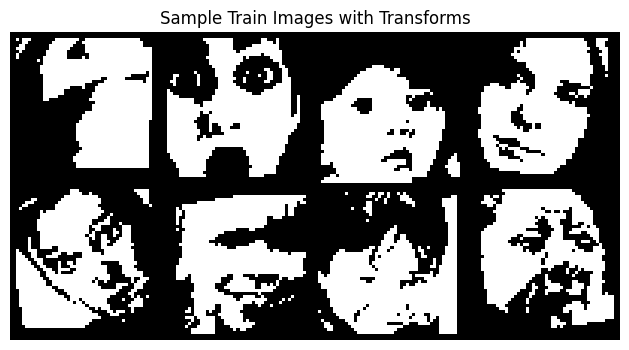

In [2]:
# Set the data directory (relative to this notebook)
data_dir = os.path.abspath(os.path.join( '..', 'data', 'FER2013'))

# Visualize a batch of images with transforms
train_fer.visualize_train_transforms(data_dir, batch_size=8, data_augmentation=True)

In [3]:
# Print some sample image vectors and their labels from the train loader
train_loader, _, _ = train_fer.get_fer_loaders(
    data_dir=data_dir,
    batch_size=8,
    data_augmentation=True,
    balanced_sampling=False
)

images, labels = next(iter(train_loader))

for i in range(min(4, images.shape[0])):
    print(f"Sample {i+1} - Label: {labels[i].item()}")
    print(images[i].flatten()[:20])  # Print first 20 values of the flattened image tensor
    print('---')

Loaded 28709 train samples
Class distribution:
  0 (angry): 3995 samples
  1 (disgust): 436 samples
  2 (fear): 4097 samples
  3 (happy): 7215 samples
  4 (sad): 4830 samples
  5 (surprise): 3171 samples
  6 (neutral): 4965 samples
Loaded 7178 test samples
Class distribution:
  0 (angry): 958 samples
  1 (disgust): 111 samples
  2 (fear): 1024 samples
  3 (happy): 1774 samples
  4 (sad): 1247 samples
  5 (surprise): 831 samples
  6 (neutral): 1233 samples
Sample 1 - Label: 3
tensor([ 1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.])
---
Sample 2 - Label: 6
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1.,  1.,  1.,  1.,  1.,  1.])
---
Sample 3 - Label: 0
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.])
---
Sample 4 - Label: 2
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -

Loaded 28709 train samples
Class distribution:
  0 (angry): 3995 samples
  1 (disgust): 436 samples
  2 (fear): 4097 samples
  3 (happy): 7215 samples
  4 (sad): 4830 samples
  5 (surprise): 3171 samples
  6 (neutral): 4965 samples
Loaded 7178 test samples
Class distribution:
  0 (angry): 958 samples
  1 (disgust): 111 samples
  2 (fear): 1024 samples
  3 (happy): 1774 samples
  4 (sad): 1247 samples
  5 (surprise): 831 samples
  6 (neutral): 1233 samples

Image 1 - Label: 3 (Happy)
Tensor shape: torch.Size([1, 48, 48])
Min value: -1.000, Max value: 1.000
First 20 pixel values: [-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0]
------------------------------------------------------------

Image 2 - Label: 6 (Neutral)
Tensor shape: torch.Size([1, 48, 48])
Min value: -1.000, Max value: 1.000
First 20 pixel values: [1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
---

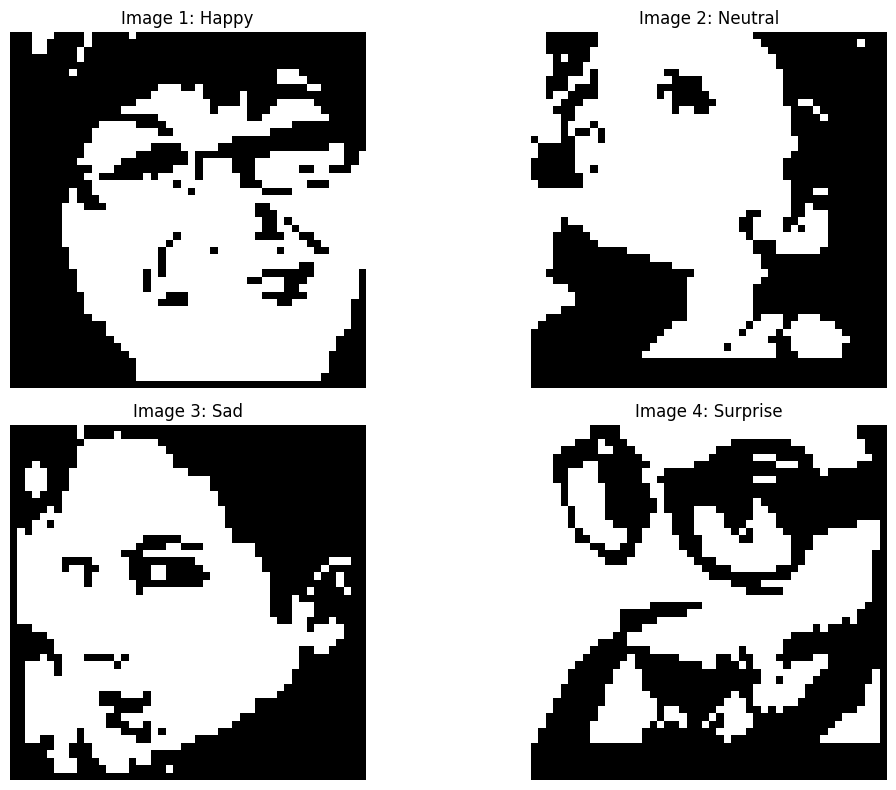

In [4]:
# Display images and print their tensor values for the same batch
import matplotlib.pyplot as plt

# Get a batch of images
train_loader, _, _ = train_fer.get_fer_loaders(
    data_dir=data_dir,
    batch_size=4,
    data_augmentation=True,
    balanced_sampling=False
)

images, labels = next(iter(train_loader))

# Emotion names for labels
emotion_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Display images
plt.figure(figsize=(12, 8))
for i in range(min(4, images.shape[0])):
    # Plot image
    plt.subplot(2, 2, i+1)
    # Unnormalize for display
    img_display = images[i] * 0.5 + 0.5
    plt.imshow(img_display.squeeze(), cmap='gray')
    plt.title(f'Image {i+1}: {emotion_names[labels[i].item()]}')
    plt.axis('off')
    
    # Print tensor values for this image
    print(f"\nImage {i+1} - Label: {labels[i].item()} ({emotion_names[labels[i].item()]})")
    print(f"Tensor shape: {images[i].shape}")
    print(f"Min value: {images[i].min().item():.3f}, Max value: {images[i].max().item():.3f}")
    print(f"First 20 pixel values: {images[i].flatten()[:20].tolist()}")
    print("-" * 60)

plt.tight_layout()
plt.show()